In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [59]:
# import load_breast_cancer and get the X_cancer, y_cancer
X_cancer, y_cancer = load_breast_cancer(return_X_y = True)

#  split to train and test using random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
#  train LogisticRegression classifier  for max_iter= 10000
clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train, y_train)
print('\nBreast cancer dataset')
print ('X_cancer.shape= {}'.format(X_cancer.shape))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Breast cancer dataset
X_cancer.shape= (569, 30)
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95


In [60]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.01,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
       
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )
        
def plot_data_logistic_regression(X,y,legend_loc= 1, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)


In [61]:
from sklearn.datasets import make_classification
Xc_2, yc_2= make_classification(n_samples=100,
                                n_features=2,
                                n_informative=2,
                                n_redundant=0,
                                random_state=2018,
                                n_clusters_per_class=1,
                                flip_y = 0.1,
                                class_sep = 0.8)

<IPython.core.display.Javascript object>


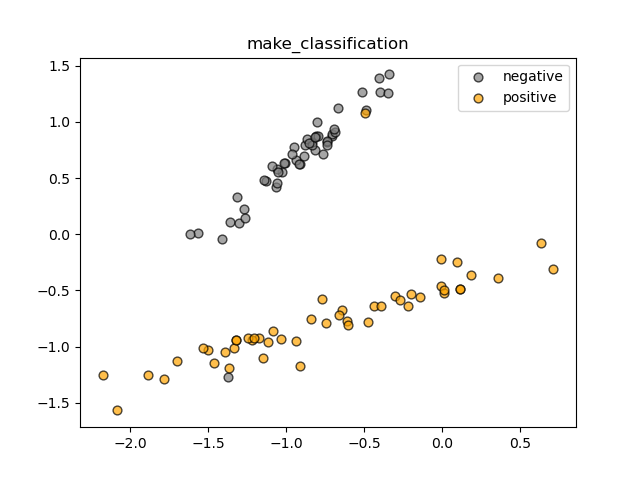

In [62]:
plt.figure()    
plot_data_logistic_regression(Xc_2,yc_2,title= 'make_classification')

In [63]:
C = 1000
X_train, X_test, y_train, y_test = train_test_split(Xc_2, yc_2, random_state = 0)
clf = LogisticRegression(C=C).fit(X_train, y_train)
print('Make Regression')
print ('Xc_2.shape= {}'.format(Xc_2.shape))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Make Regression
Xc_2.shape= (100, 2)
Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.92


<IPython.core.display.Javascript object>


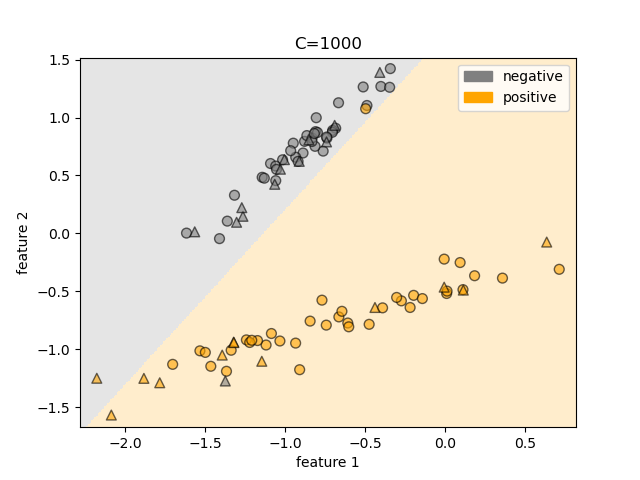

Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


In [64]:
plt.figure()    
plot_decision_boundary(clf, X_train, y_train, X_test, y_test, title='C={}'.format(C),precision=0.01, plot_symbol_size = 50)

<IPython.core.display.Javascript object>


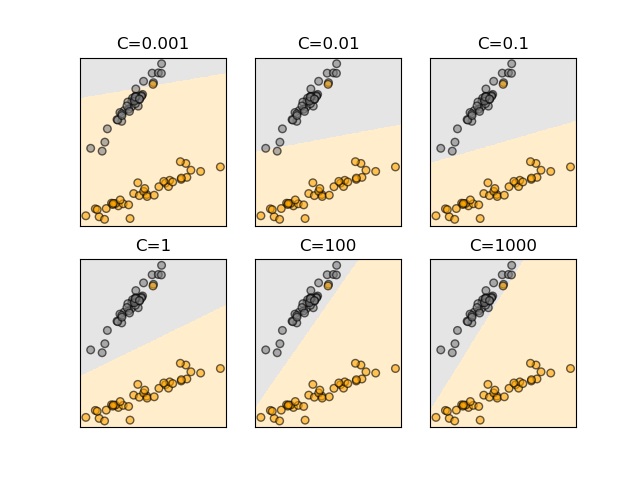

Accuracy = 0.57
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.97
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


In [65]:
_, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
axes = (ax1, ax2, ax3, ax4, ax5, ax6)
C = (0.001, 0.01, 0.1, 1, 100, 1000)
for i in range (len(C)):    
    clf = LogisticRegression(C=C[i]).fit(X_train, y_train)
    print('Accuracy = {:.2f}'.format(clf.score(X_train, y_train)))

    plot_decision_boundary(clf, X_train, y_train, title='C={}'.format(C[i]),precision=0.01, plot_symbol_size = 30, ax= axes[i], is_extended=False)
    

In [66]:
def plot_decision_boundary_poly(clf, X_train, y_train, degree, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap    
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
    

 
    
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    target_samples_grid_poly = poly.fit_transform(target_samples_grid)
    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid_poly)
    print ('Computing prediction completed.')
    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

   
        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)

def plot_multi_class_logistic_regression(X,y,dict_names=None, colors= None,  title =None):
    '''
    Draw the multi class samples of 2 features
    :param X: X 2 ndarray (m,2),
    :param y: vector (m,)
    :param dict_names: dict of values of y and names
    :return: None
    '''
    if not colors:
        colors_for_points = ['green','grey', 'orange', 'brown'] 
    else: 
         colors_for_points = colors 
            
    y_unique = list(set(y))

    for i in range (len(y_unique)):
        ind = y == y_unique[i] # vector

        if dict_names:
            plt.scatter(X[ind,0], X[ind,1], c=colors_for_points[i], s=40, label=dict_names[y_unique[i]],edgecolor='black', alpha=.7)
        else:
            plt.scatter(X[ind, 0], X[ind, 1], s=40, c=colors_for_points [i], edgecolor = 'black', alpha = 0.7)
    if title:
        plt.title(title)

    if dict_names:
        plt.legend(frameon=True)

def draw_linear_decision_boundaries_multiclass(clf,X,):
    colors=  ['green','grey', 'orange', 'brown'] 
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
        # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
        # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)


In [67]:
from sklearn.datasets import make_blobs

In [68]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y 
                       cluster_std = 1.3, random_state = 4)
y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]

<IPython.core.display.Javascript object>


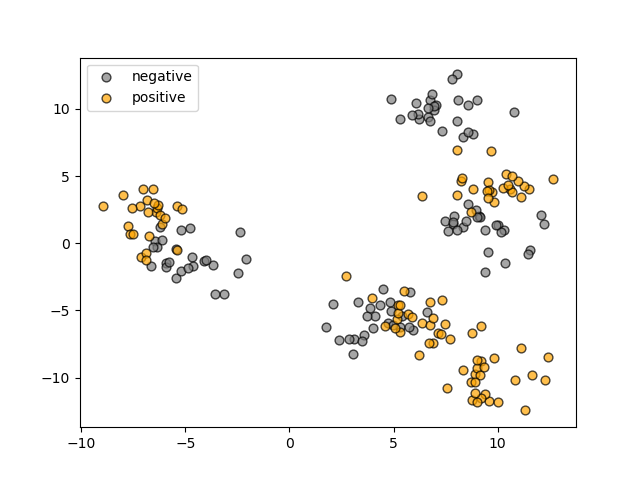

In [69]:
plt.figure()
plot_data_logistic_regression(X_mk8,y_train)

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
degree = 10
poly= PolynomialFeatures(degree=degree,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0
X_train_poly= poly.fit_transform(X_mk8)

In [72]:
C = 0.01
clf = LogisticRegression(C=C, max_iter = 2000).fit(X_train_poly, y_train)
accuracy = clf.score (X_train_poly, y_train)
print("train accuracy= {:.3%}".format(accuracy))

train accuracy= 92.000%


C:\Users\PotatoX8x\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


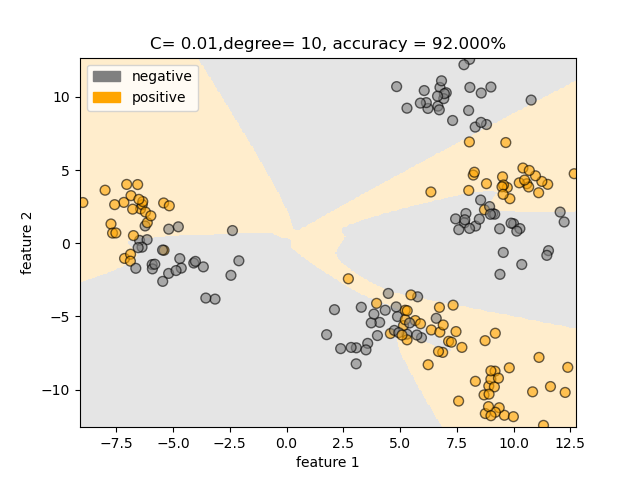

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Computing prediction completed.


In [73]:
plt.figure()
ax = plt.gca()
plot_decision_boundary_poly(clf, X_train_poly, y_train, degree= degree, ax = ax, precision= 0.05, title = 'C= {},degree= {}, accuracy = {:.3%}'.format(C, degree, accuracy))

In [74]:
#Fruits
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 
fn=  os.path.join(path , 'fruit_data_with_colors.txt')
df_fruits = pd.read_table(fn) 
X = df_fruits[['width', 'height']].values
y = df_fruits['fruit_label'].values
df_fruits.head(20)
fruits_dict = dict(zip(df_fruits['fruit_label'].unique(), df_fruits['fruit_name'].unique()))

<IPython.core.display.Javascript object>


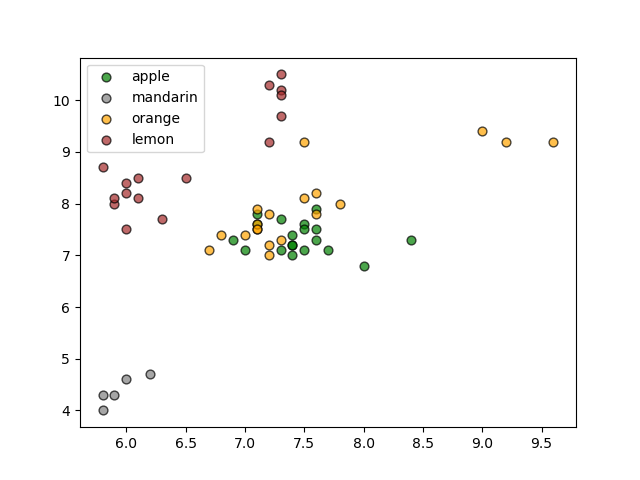

In [75]:
plt.figure() 
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)

Accuracy=0.7288135593220338


<IPython.core.display.Javascript object>


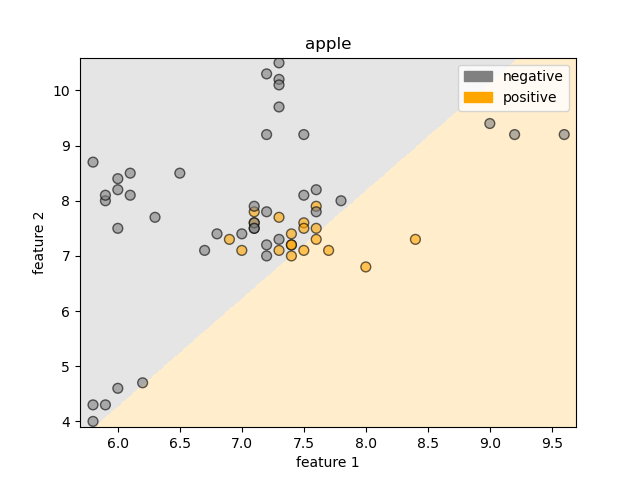

Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


In [76]:
fruit_label = 1
y_one_vs_all = y==fruit_label
y_one_vs_all = y_one_vs_all.astype(int)

clf = LogisticRegression(C=1000).fit (X, y_one_vs_all)
print ('Accuracy={}'. format (clf.score(X,y_one_vs_all)))
plt.figure()
plot_decision_boundary(clf, X, y_one_vs_all, title=fruits_dict[fruit_label], precision = 0.01)

In [77]:
print ('set(y) = {}'.format (set(y)))
print ('X.shape= {}\ny.shape = {}, '.format (X.shape, y.shape))
clf= LogisticRegression(C=1000, max_iter=2000).fit(X, y)
print ('Accuracy={}'. format (clf.score(X,y)))
clf.intercept_, clf.coef_

set(y) = {1, 2, 3, 4}
X.shape= (59, 2)
y.shape = (59,), 
Accuracy=0.847457627118644


(array([-29.87423239,  52.36949305, -41.89807162,  19.40281096]),
 array([[  8.62932976,  -3.50450993],
        [ -1.55244692,  -6.27029248],
        [  6.3178001 ,   0.3446585 ],
        [-13.39468294,   9.43014391]]))

<IPython.core.display.Javascript object>


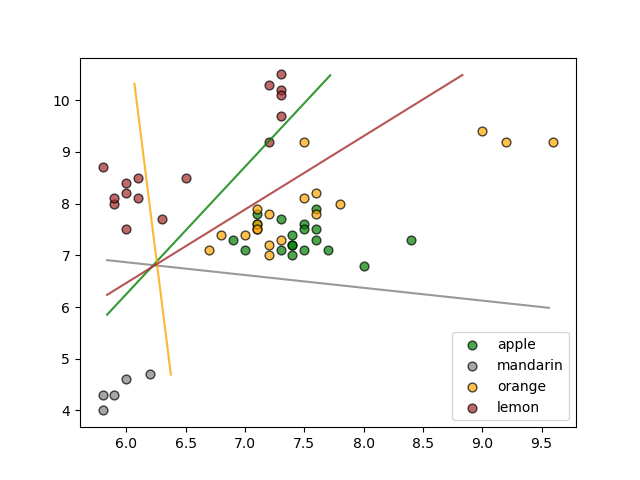

In [78]:
plt.figure() 
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)
draw_linear_decision_boundaries_multiclass(clf,X)

In [79]:
#Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y, labels = iris.data, iris.target, iris.target_names
print (labels)
clf= LogisticRegression(C=100, max_iter=2000).fit(X, y)
print ('Accuracy={}'. format (clf.score(X,y)))
clf.intercept_, clf.coef_

['setosa' 'versicolor' 'virginica']
Accuracy=0.98


(array([ 19.94748356,   5.23705833, -25.18454189]),
 array([[-0.41343406,  3.43751023, -6.39505761, -3.50253474],
        [ 1.36734212,  0.43283762, -0.51811035, -4.42036616],
        [-0.95390806, -3.87034785,  6.91316797,  7.9229009 ]]))

Accuracy=0.8333333333333334
clf.intercept_=[ 25.20698864  -6.10712004 -19.0998686 ], 
clf.coef_=
[[-9.33565744  8.18421202]
 [ 3.72540036 -4.30414545]
 [ 5.61025708 -3.88006658]]


<IPython.core.display.Javascript object>


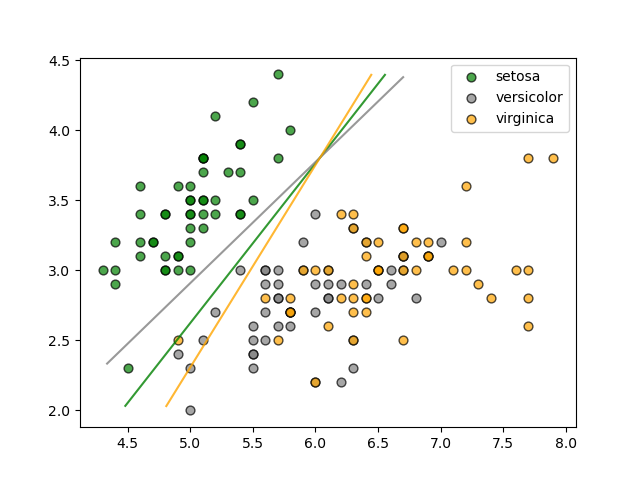

In [80]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
dict_names = {i:v for i,v in enumerate(labels)}

X2= X[:,:2]
clf= LogisticRegression(C=100).fit(X2, y)
print ('Accuracy={}'. format (clf.score(X2,y)))
print ('clf.intercept_={}, \nclf.coef_=\n{}'.format(clf.intercept_, clf.coef_))
plt.figure() 
plot_multi_class_logistic_regression (X2,y, dict_names = dict_names)
draw_linear_decision_boundaries_multiclass(clf,X2)